In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import plotting_style

In [71]:
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1e-6, 0
S0 = N - I0 - R0

# Specify tau and R0
R0, tau = 1.5, 5.2

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = R0 / tau, 1./tau
t = np.linspace(0, 250, 365)

def SIR(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(SIR, y0, t, args=(beta, gamma))
S, I, R = ret.T

Text(0.5, 0, 'Time (days)')

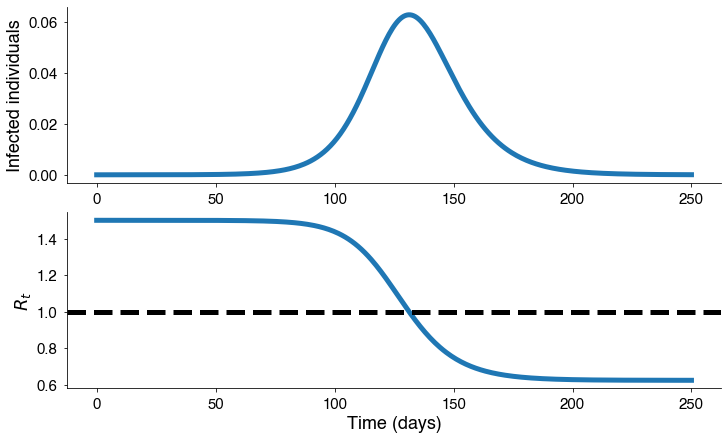

In [72]:
fig = plt.figure(figsize=(10., 6.), constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=2)
ax0 = fig.add_subplot(spec[0])
ax0.plot(t, I)

ax1 = fig.add_subplot(spec[1])
ax1.plot(t, R0 * S)
ax1.axhline(y=1.0, color="k", linestyle="--")

ax0.set_ylabel("Infected individuals")
ax1.set_ylabel("$R_{t}$")
ax1.set_xlabel("Time (days)")

In [73]:
fig.savefig("../figures/SIR_Rt.png")